In [1]:
import pandas as pd
import json
import pickle

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

from vickygod import *
%matplotlib inline

Using TensorFlow backend.


# Vicky's Godly Dataset

In [2]:
dataset = pickle.load(open('data/selected_frames.data.p', 'rb'))
dataset.head()

,Arg1,Arg2,Relation
0,[],"[七, 年前, ，, 年, 僅, 九, 歲, 及, 八, 歲, 的, 板橋市, 某, 國小,...",殺人罪
1,"[0, ‧, 3, 坪, 喊價, 800萬, 畸零地, 圍籬, 阻, 路, 拆, ！]","[○, ．, 三, 坪, 畸零地, 能, 「, 螞蟻, 吃, 大象, 」, ？, 北市, 議...",道路交通管理處罰條例
2,"[100, cc, 催芽劑奪, 信義, 鄉四, 命]","[信義, 鄉民, 朱明福, ，, 涉嫌, 將, 催芽劑, 摻入, 米酒, ，, 導致, 前,...",殺人罪
3,"[101, 前董座, 林鴻明, 二審, 輕, 判, 1年, 8月]","[前, 台北, 101, 董事長, 林鴻明, ，, 被, 控, 掏空, 股票, 上市, 的,...",證券交易法
4,"[101, 大樓, 前添, 紛爭, 台獨, 大, 旗, 砸傷, 人]","[台北, 101, 大樓, 前, 法輪, 功, 、, 愛國, 同心, 會, 的, 爭端, ，...",傷害罪


In [3]:
laws = dataset.Relation.unique().tolist()

# Parameters

In [4]:
n_classes = len(laws)
n_svd = 300

# Generate Training Data

In [5]:
train_x, train_y = [], []

for index, frame in dataset.iterrows():
    law_ind = laws.index(frame['Relation'])
    seg_content = ' '.join(frame['Arg2'])
    train_x.append(seg_content)
    train_y.append(law_ind)
    
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(train_x)
svd = TruncatedSVD(n_svd)
normalizer = Normalizer()
lsa = make_pipeline(svd, normalizer)

train_x = lsa.fit_transform(vectors)
train_y = to_categorical(train_y, n_classes)

train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.25, random_state=42)

# A Garbage Model

In [6]:
def get_garbage_model():
    model = Sequential()
    model.add(Dense(n_svd // 2, activation='relu', input_dim=n_svd))
    model.add(Dropout(0.3))
    model.add(Dense(n_svd // 4, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    return model

Max Valid Acc Epoch
            acc      loss      acc      loss
          train     train    valid     valid
epoch                                       
37     0.947281  0.210652  0.60835  2.574226


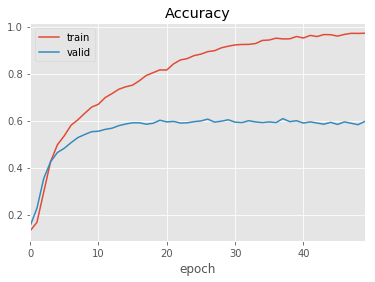

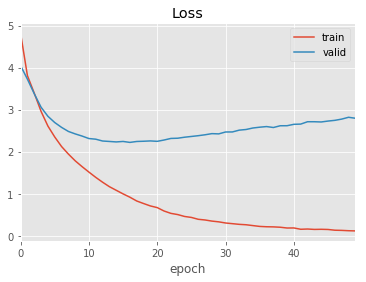

In [7]:
model = get_garbage_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_x ,train_y, epochs=50, validation_data=(valid_x, valid_y), verbose=0)
record(hist)